**Purpose**: Analyze the Sing Tao Daily data.

In [1]:
import os
import time
import pickle
import multiprocessing
import gensim.models.word2vec as w2v
import sklearn.manifold
from sklearn import decomposition
import numpy as np
#from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import re

In [2]:
base_path = 'C:/Users/sunny/Desktop/news_nlp/'
publisher='星島日報'
os.chdir(base_path)

In [3]:
model= w2v.Word2Vec.load(publisher + '_word2vec.w2v')

In [4]:
model.wv.most_similar("警察")

[('公共關係', 0.5952054858207703),
 ('警員', 0.5851476192474365),
 ('科總', 0.5649308562278748),
 ('濫暴', 0.563213586807251),
 ('謝振中', 0.5571808815002441),
 ('佐級', 0.5534635186195374),
 ('余鎧均', 0.5410553216934204),
 ('警隊', 0.5398462414741516),
 ('警方', 0.5349482893943787),
 ('林志偉', 0.5317156314849854)]

In [5]:
model.wv.most_similar("示威者")

[('黑衣人', 0.6461765170097351),
 ('堵路', 0.6221756339073181),
 ('退至', 0.6202255487442017),
 ('包圍', 0.6167661547660828),
 ('狂擲', 0.6109768748283386),
 ('與警', 0.607005774974823),
 ('傘陣', 0.6041836738586426),
 ('龍匯', 0.5848780274391174),
 ('防暴警察', 0.5806837677955627),
 ('游擊戰', 0.5788576006889343)]

In [7]:
model.wv.most_similar("白衣人")

[('無差別', 0.668743908405304),
 ('七二一', 0.6517642736434937),
 ('西鐵站', 0.6273655891418457),
 ('毆鬥', 0.5969417691230774),
 ('追打', 0.5847768187522888),
 ('木棍', 0.5803982615470886),
 ('元朗', 0.5727429986000061),
 ('施襲', 0.5481896996498108),
 ('西鐵', 0.5452370047569275),
 ('白衣', 0.5308470726013184)]

In [9]:
model.wv.most_similar("黑衣人")

[('示威者', 0.6461763381958008),
 ('中年男子', 0.6414922475814819),
 ('蒙面人', 0.6351783275604248),
 ('紅衣', 0.6290518641471863),
 ('退至', 0.6244744658470154),
 ('傘陣', 0.6226264834403992),
 ('拾起', 0.6220969557762146),
 ('追打', 0.6190387010574341),
 ('遭多人', 0.6161138415336609),
 ('堵路', 0.6159265637397766)]

In [26]:
model.wv.doesnt_match(['警察','白衣人','市民'])

'市民'

In [7]:
model.wv.most_similar(positive=['警察','白衣人'],topn=3)

[('無差別', 0.6352517604827881),
 ('濫暴', 0.6006172299385071),
 ('手無寸鐵', 0.5977070927619934)]

In [8]:
model.wv.most_similar(positive=['警察','警隊', '警方', '警員','防暴'],negative=['良知','紀律'],topn=3)

[('警', 0.673295795917511),
 ('便衣', 0.6418761014938354),
 ('警在', 0.6142526268959045)]

In [4]:
model.wv.most_similar(positive=['建制'],negative=['民主'],topn=3)

[('中人', 0.2593516409397125),
 ('區選', 0.2578968405723572),
 ('泛民', 0.2433014065027237)]

In [11]:
print(model.wv.most_similar(positive=['攻擊','示威者'],topn=3))
print(model.wv.most_similar(positive=['防守','示威者'],topn=3))

[('削尖', 0.632737934589386), ('身分不明', 0.6175231337547302), ('狂擲', 0.6159257888793945)]
[('傘陣', 0.6596261262893677), ('狂擲', 0.656789243221283), ('削尖', 0.6565763354301453)]


In [12]:
print(model.wv.most_similar(positive=['攻擊','警察'],topn=3))
print(model.wv.most_similar(positive=['防守','警察'],topn=3))

[('手無寸鐵', 0.6149179935455322), ('削尖', 0.587774395942688), ('警員', 0.5707443952560425)]
[('削尖', 0.6268419623374939), ('向天', 0.5982529520988464), ('擎槍', 0.5875170826911926)]


In [13]:
model.wv.most_similar(positive=['遊行','市民'],topn=3)

[('民陣', 0.6296366453170776),
 ('主辦者', 0.6292965412139893),
 ('不反對通知書', 0.6283069849014282)]

In [14]:
model.wv.most_similar(positive=['地鐵','警察'],topn=3)

[('公共關係', 0.5294700264930725),
 ('謝振中', 0.5180869698524475),
 ('科總', 0.5120863914489746)]

In [27]:
model.wv.most_similar(positive=['公共關係','警察'],topn=3)

[('科總', 0.8166055083274841),
 ('謝振中', 0.7626382112503052),
 ('江永祥', 0.7389200329780579)]

In [15]:
model.wv.most_similar(positive=['子彈','警察'],topn=3)

[('彈匣', 0.6353832483291626),
 ('彈殼', 0.6193885207176208),
 ('曲尺', 0.6105589270591736)]

In [5]:
tnse_result = os.path.join(base_path, publisher + '_2d_tsne.pkl')
with open(tnse_result, "rb") as f:   # Unpickling
    df= pickle.load(f)

In [6]:
df.head(8)

,token,x,y
0,，,2.282656,-3.063334
1,,3.583279,-3.037843
2,的,1.290142,-3.628560
3,「,-5.782082,10.856745
4,在,3.714983,-1.637922
5,、,1.937181,-4.611476
6,」,-5.773089,10.871822
7,及,1.829747,-4.265761


In [75]:
[word[0] for word in model.wv.most_similar("警察")]

['公共關係', '警員', '科總', '濫暴', '謝振中', '佐級', '余鎧均', '警隊', '警方', '林志偉']

In [76]:
# Given target token, return a df that contains
# the tsne 2D vector of its most similar tokens. 
most_similar_token = [word[0] for word in model.wv.most_similar("警察")]
d=df[df['token'].isin(most_similar_token)]
d

,token,x,y
43,警方,-13.630831,44.502674
128,警員,2.457062,47.442986
737,警隊,-20.939877,3.002833
3285,公共關係,-15.814184,49.021637
5007,謝振中,-15.822157,49.034832
6169,科總,-15.838519,49.022800
11721,林志偉,-32.459263,28.649954
13751,佐級,-32.472717,28.646482
14256,濫暴,-18.034103,9.661465
19711,余鎧均,-16.116743,48.779968


In [77]:
def plot_most_similar(model,df,token,n):
    try:
        #plt.clf()
        #plt.close('all')
        plt.figure()
        ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')

        most_similar_token = [word[0] for word in model.wv.most_similar(token,topn=n)]
        print(most_similar_token)
        
        d=df[df['token'].isin(most_similar_token)]

        min_x = min(d['x'].tolist())
        max_x = max(d['x'].tolist())
        min_y = min(d['y'].tolist())
        max_y = max(d['y'].tolist())

        x_range = (int(min_x)-10,int(max_x)+10)
        y_range = (int(min_y)-10,int(max_y)+10)

        plt.xlim(x_range)
        plt.ylim(y_range)
        #plt.rcParams.update({'font.size': 5})

        
        for index, row in d.iterrows():
            plt.text(x=row['x'], y=row['y'], s=row['token'], fontproperties = ChineseFont, fontsize=15, va="center")

        
        d=df.loc[df['token']==token]
        token=d.iloc[0][0]
        x_value=d.iloc[0][1]
        y_value=d.iloc[0][2]
        plt.text(x=x_value, y=y_value, s=token, fontproperties = ChineseFont, fontsize=15, va="center")

        
        plt.show()
    except:
       print(f'Can not find {token} in dataset.') 

<IPython.core.display.Javascript object>


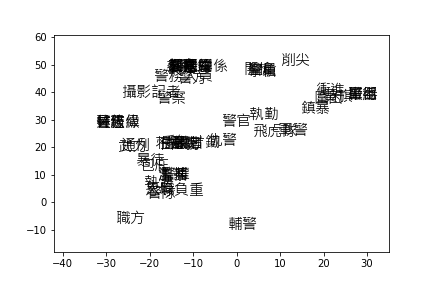

['公共關係', '警員', '科總', '濫暴', '謝振中', '佐級', '余鎧均', '警隊', '警方', '林志偉', '郭嘉銓', '警總', '員佐級', '江永祥', '警務人員', '手無寸鐵', '攝影記者', '執法', '警司', '暴徒', '鎮暴', '性暴力', '警權', '衝進', '通例', '職方', '軍器', '警官', '武力', '執勤', '抗議者', '擎槍', '天職', '警務', '開槍', '濫捕', '廠街', '黃旗', '麥展', '飛虎隊', '圍困', '仇警', '忍辱負重', '不禮貌', '軍警', '削尖', '包庇', '兇', '輔警', '插贓']


In [78]:
%matplotlib notebook
plot_most_similar(model,df,"警察",50)

<IPython.core.display.Javascript object>


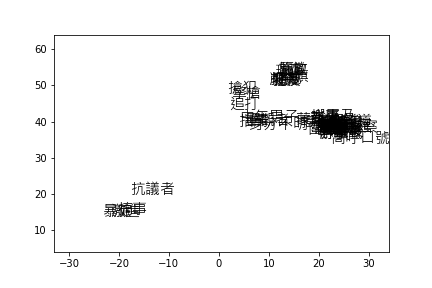

['黑衣人', '堵路', '退至', '包圍', '狂擲', '與警', '傘陣', '龍匯', '防暴警察', '游擊戰', '設路障', '防暴', '警在', '防暴隊', '包抄', '黃旗', '搗亂', '清場', '叫罵', '搞事', '球彈', '擎槍', '抗議者', '居道', '封堵', '驅散', '圍困', '蒙面人', '中年男子', '後撤', '物及', '舉旗', '噴', '激進', '聚集', '施放', '指罵', '投擲', '野貓', '高呼口號', '搶犯', '追打', '身分不明', '削尖', '水馬及', '暴徒', '佐敦道', '圍觀者', '搬來', '入夜後']


In [79]:
%matplotlib notebook
plot_most_similar(model,df,"示威者",50)

Concordance

In [23]:
# recreating sth like the nltk's concordance function
def neighbor_text(text,keyword,n):
    key_regex = r".{0,"+str(n)+r"}" + keyword + r".{0,"+str(n)+r"}"
        # use re.escape(keyword) if keyword may contain special characters
    result_ls = re.findall(key_regex,text)
    return result_ls

In [25]:
raw_csv_path=os.path.join(base_path, publisher + '_concat.csv')
df = pd.read_csv(raw_csv_path)
content_ls = df['Content'].tolist()
all_article = ''.join([article for article in content_ls])

In [26]:
neighbor_text(all_article,'暴徒',10)[:20]

['受傷。\u3000\u3000大批襲警的暴徒其後被拘捕，部分人遭',
 '的左翼陣營是「貧民窟暴徒」和「左膠」，並說自',
 '防暴警察到場增援驅散暴徒，惟仍有逾千人在立法',
 '幾示威者開始失控，如暴徒般抬起鐵馬、鐵枝、拆',
 '員更血流披面，警員向暴徒噴胡椒噴劑，又以警棍',
 '拉扯一輪，警員將部分暴徒制服拘捕，大部分示威',
 '強烈譴責衝擊立法會的暴徒製造事端。十八區撲滅',
 '厲譴責日前立法會外的暴徒。\u3000\u3000（星島日報報道',
 '表聲明，嚴正地向所有暴徒予以最嚴厲譴責，又指',
 '體為目標，執法人員對暴徒絕不姑息，定必追究到',
 '前日反修例遊行中，有暴徒衝擊、阻塞主要通道及',
 '退縮。聯會強烈譴責有暴徒暴力衝擊立法會，襲擊',
 '出人命」，要強烈譴責暴徒行為。\u3000\u3000黃英豪說，',
 '力應對，需要強烈譴責暴徒行為。他認同，每個人',
 '披面，遭同僚救出時，暴徒仍然向他投擲鐵枝，十',
 '分粗暴。\u3000\u3000暴徒用集會人群做掩護\u3000\u3000',
 '擊，被逼使用武器阻止暴徒衝擊；不過，暫時不會',
 '催淚彈，抹黑示威者為暴徒。她要求立法會主席梁',
 '確定自己的看法。\u3000\u3000暴徒有預謀\u2002早經精密策劃',
 '行，並指警方強烈譴責暴徒的暴力行為，並呼籲公']

In [27]:
neighbor_text(all_article,'濫暴',10)[:20]

['和貢獻知識，舉報警方濫暴事件，更建議可隨心與',
 '」、「尊重生命，反對濫暴」等標語，抗議及強烈',
 '門主管。聲明批評警方濫暴，指瞄準頭部開槍會令',
 '應市民聲音，加上警察濫暴，政府暴力、制度暴力',
 '門青山警署，抗議警方濫暴執法。一名三十七歲承',
 '樓大堂集會，抗議警方濫暴、阻礙醫護人員施救等',
 '聯署信，強烈譴責警察濫暴，製造白色恐怖，又蓄',
 '極。聲明強烈譴責警方濫暴，要求他們停止向市民',
 '察總部示威，譴責警方濫暴，並宣布成立由資深黨',
 '時，反駁警方被指濫捕濫暴的指控，強調任何執法',
 '應，但卻遲遲不就警方濫暴嚴肅譴責等，要求段崇',
 '力，憂放寬指引後警員濫暴情況變本加厲。\u3000\u3000(',
 '外集結，抗議警方執法濫暴，聲援十一國慶中槍的',
 '對香港警方執法不公、濫暴等問題避而不談，選擇',
 '請求校長公開譴責警方濫暴，段崇智表明「會譴責',
 '內容包括指控警方涉嫌濫暴，以及查詢有關執法時',
 '，指四個月以來，警方濫暴情況嚴重，「政府不但',
 '援被捕學生及譴責警方濫暴，只重申校方已盡力支',
 '察總部，抗議警方執法濫暴，其間一名便衣警員意',
 '項要求，包括譴責警方濫暴、承諾支援被捕學生、']

***

In [3]:
raw_csv_path=os.path.join(base_path, publisher + '_concat.csv')
df = pd.read_csv(raw_csv_path)
df['Date']= df['Date'].str[:10]

In [101]:
df.head(2)

,Title,Author,Category,Date,Link,Content,Is_offical,Content_len
0,韓國瑜否認有私生女 控綠媒董事長誹謗,星島日報,中國,2019-06-01,http://std.stheadline.com/daily/article/detail...,（星島日報報道）台灣人氣王韓國瑜的支持者，預備在今日於台北的總統府前凱達格蘭大道舉行挺韓...,True,821
1,台外島部署火箭系統 射程覆蓋閩境大城市,星島日報,中國,2019-06-01,http://std.stheadline.com/daily/article/detail...,（星島日報報道）台灣媒體透露，台灣軍方已將自己研發的「雷霆2000」多管火箭系統部署在大...,True,498


<IPython.core.display.Javascript object>


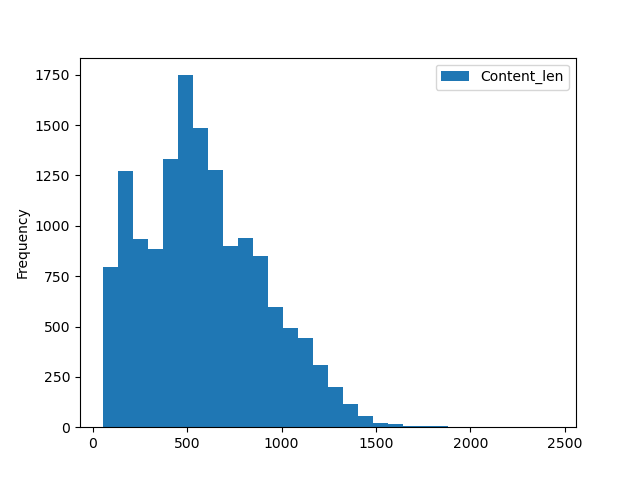

In [21]:
# explore the content len distribution using histogram
df.reset_index().plot.hist(x='index',y='Content_len',bins=30)
plt.show()
#df.reset_index().head(5)

In [10]:
df.shape[0]

14697

In [102]:
def freq_by_date(df, token_ls):
    
    # group data by date and join all content of that date as one string
    df=df.groupby('Date')['Content'].apply(','.join).reset_index()
    
    # calculate word frequency for each date
    for token in token_ls:
        df[token] = df['Content'].str.count(token)
    
    return df

In [107]:
date_token_pivot_df= freq_by_date(df,'721,白衣人'.split(','))
date_token_pivot_df.loc[date_token_pivot_df['白衣人']>2] 

,Date,Content,721,白衣人
51,2019-07-22,（星島日報報道）台灣的蔡英文總統今日將結束外訪，返回台北。在美國丹佛過境的最後一天，她在...,0,9
52,2019-07-23,(星島日報報道)台灣的蔡英文總統昨天結束外訪返抵台灣後，竟爆出國安局人員利用總統返台的「...,0,42
53,2019-07-24,(星島日報報道)美國對華為的封殺令進一步緩和。特朗普總統周一會見美國七家科技巨頭企業負責...,0,7
54,2019-07-25,(星島日報報道)中美下周將恢復面對面貿易談判。白宮昨天宣布，美國貿易代表萊特希澤和財政部...,0,15
55,2019-07-26,（星島日報報道）中國前總理李鵬周一深夜去世，享年九十一歲，家人設立靈堂，遺孀朱琳、長子李...,0,6
56,2019-07-27,（星島日報報道）美國聯邦快遞（FedEx）將華為包裹轉送美國事件有新發展。新華社昨天報道...,0,7
57,2019-07-28,（星島日報報道）中美重開貿易談判前夕，美國總統特朗普再次開火，炮轟世界貿易組織允許中國、...,0,13
58,2019-07-29,（星島日報報道）中美明日將在上海舉行第十二輪高級別經貿磋商，中方釋放善意。官方報道稱，中...,0,3
60,2019-07-31,(星島日報報道)中美新一輪貿易談判昨日起一連兩天在上海舉行。昨晚，劉鶴副總理與美國貿易代...,0,4
63,2019-08-03,（星島日報報道）中國唯一一名曾三次升空的太空人景海鵬，近日出任解放軍陸軍第八十二集團軍副...,0,4


In [108]:
date_token_pivot_df.loc[51]['Content']

'\u3000\u3000（星島日報報道）台灣的蔡英文總統今日將結束外訪，返回台北。在美國丹佛過境的最後一天，她在美國參議院議員陪同下，參觀美國國家大氣研究中心，戴上牛仔帽騎馬。她與隨團記者茶敍，談及明年總統大選，稱這是價值制度與生活方式的選擇。有台灣學者對本報指出，過境美國規格拉高，確實有助蔡的選情，但此行沒有見到美國聯邦政府高層官員，也表示美方對於比較敏感的安排，還是比較謹慎。\u3000\u3000結束十二天外訪行程前，蔡英文在丹佛的最後一晚，與隨團媒體記者茶敍。這是台灣的總統首次在美國公開和媒體茶敍，美國在台協會主席莫健（James Moriarty）也陪同。對於外媒將二○二○大選視為親中與親美路線的選擇，蔡英文認為，台灣是民主社會，台灣選民聚焦在國家的未來，尤其是民主自由的生活方式能否持續。她覺得，二○二○的選戰是一個價值制度與生活方式的選擇。\u3000\u3000蔡英文本月十一日起展開名為「自由民主永續之旅」的加勒比海四國訪問，去程及返程過境美國紐約及丹佛，在美逗留合共四晚，是歷來最長，而且在美期間第一次於台灣駐美機構會晤邦交國代表，並首次公開與隨團記者茶敍，都創下首例。《洛杉磯時報》報道，歷年台灣領袖過境美國的規格是台美關係重要指標，蔡此訪可見台美關係一如美方所言是「歷年最佳」。台灣地位特殊 美方謹慎處理\u3000\u3000台灣文化大學廣告系教授兼主任鈕則勳昨天接受本報訪問表示，過境美國規格拉高，確實有助蔡的選情。畢竟在內政及經濟方面，蔡拿不出有效政績的當下，她便能以對美國外交突破，來吹捧自己的外交政績；而蔡也能藉「聯美抗中（大陸）」的操作，不斷地強化自己的競選主軸，鞏固支持者的選票。\u3000\u3000中央社引述台灣政治大學名譽教授丁樹範認為，在中美貿易戰的外在環境下，台灣的地位變得很特殊，加上對中國強硬成為美國國內最大的共識，在這些條件配合下，蔡過境美國獲得一些滿不錯的安排。但丁樹範也說，這次蔡英文沒有見到美國聯邦政府高層官員，這也表示台美關係雖然不錯，但美方對於比較敏感的安排還是謹慎處理。\u3000\u3000根據台灣《ETtoday新聞雲》上周四公布的民調顯示，蔡英文以百分之三十三點八三的支持度，領先國民黨的高雄市長韓國瑜。有分析認為，蔡英文的民望由今年初低位上升，除了在美台外交取得突破外，和香港近期的反修例風波也有關。,\u300

In [104]:
def plot_freq(df,token_ls):
    
    df= freq_by_date(df,token_ls)
    
    #plt.clf()
    #plt.cla()
    #plt.close()
    ax = plt.gca()  # gca stands for 'get current axis'
    
    for token in token_ls:
        df.plot(kind='line',x='Date',y=token,ax=ax)

    ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')
    plt.legend(prop=ChineseFont)
    plt.show()

<IPython.core.display.Javascript object>


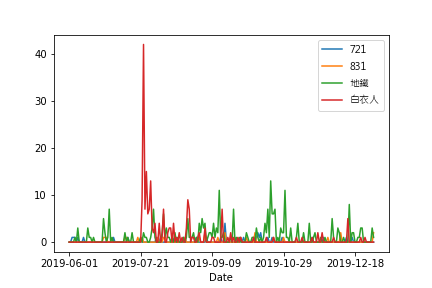

In [105]:
%matplotlib notebook
#plot_freq(df,'橡膠子彈,水砲車,催淚彈'.split(','))
plot_freq(date_token_pivot_df,'721,831,地鐵,白衣人'.split(','))
#plot_freq(df,['白衣人'])
#'警察,示威,血,白衣人'.split(',')
#['警察', '示威', '血', '白衣人']

In [47]:
neighbor_text(all_article,'白衣人',10)[:20]

['亦爆發新戰線，數百名白衣人在區內遊行，其中幾十',
 '另一批持木棍及藤條的白衣人則殺入西鐵元朗站，在',
 '江，職員報案求救，有白衣人疑病發暈倒，須送院搶',
 '救，警方到場時所有白衣人已散去，港鐵宣布提早',
 '至昨晚九時許，區內的白衣人愈來愈多，高峰期多達',
 '一批手持木棍及藤條的白衣人，轉戰元朗西鐵站，他',
 '至今晨一時，仍有一批白衣人在西鐵元朗站一帶聚集',
 '，當中一名中年白衣人疑病發暈倒，送院命危',
 '衝突，同時元朗又發生白衣人追打黑衣示威者的暴力',
 '島日報報道)數百名「白衣人」前晚血洗元朗引來軒',
 '獲悉有一批涉嫌施襲的白衣人進入南邊圍村，於是重',
 '提供消息。\u3000\u3000數百名白衣人前晚在元朗進行「光復',
 '鐘後，大批警員到場，白衣人繼續在街頭向途人施襲',
 '批涉嫌有分毆打巿民的白衣人走入南邊圍村，派員趕',
 '最高峰達到百人，部分白衣人更手持木棍及其他武器',
 '鐵準備離開元朗，但遭白衣人攔腰打中一棍，亦被扑',
 '島日報報道)網上流傳白衣人前晚血洗西鐵元朗站暴',
 '及立法會議員何君堯與白衣人握手的片段，令外界質',
 '段，顯示何君堯與多名白衣人握手，亦向對方說「辛',
 '及舉起拇指以示讚揚，白衣人稱讚何是「英雄」，令']

***

In [93]:
def plot_token(df,token,size):
    try:
        d=df.loc[df['token']==token]
        x_value=int(d.iloc[0][1])
        y_value=int(d.iloc[0][2])
        size = int(size)
        
        fig = plt.figure()
        ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')
        x_range = (x_value-size,x_value+size)
        y_range = (y_value-size,y_value+size)
        #print(x_range,y_range)
        
        plt.xlim(x_range)
        plt.ylim(y_range)
        #plt.rcParams.update({'font.size': 5})

        # add annotations one by one with a loop
        for index, row in df.iterrows():
            #if index < 5:
            if row['x'] in range(x_range[0],x_range[1]) and row['y'] in range(y_range[0],y_range[1]):
                plt.text(x=row['x'], y=row['y'], s=row['token'], fontproperties = ChineseFont, fontsize=15)
                #print(row['x'], row['y'],row['token'])
        #for line in range(0,df.shape[0]):
            #if df.x[line] in range(x_range[0],x_range[1]) and df.y[line] in range(y_range[0],y_range[1]):
                #plt.text(x=df.x[line], y=df.y[line], s=df.token[line], fontproperties = ChineseFont, fontsize=15)
        plt.show()
    except:
        print(f'Can not find {token} in dataset.')

In [94]:
token=list('我是人類abc')
x=[1,2,3,4,5,6,7]
y=[1,2,3,4,5,6,7]
df = pd.DataFrame(list(zip(token,x,y)), columns=['token','x', 'y'])
df

,token,x,y
0,我,1,1
1,是,2,2
2,人,3,3
3,類,4,4
4,a,5,5
5,b,6,6
6,c,7,7


<IPython.core.display.Javascript object>


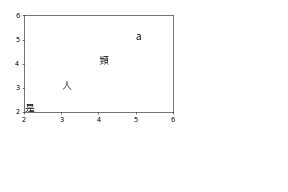

In [95]:
plot_token(df,'類',2)